In [1]:
import os
import shutil
from zipfile import ZipFile 
import pandas as pd
import re

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

from sklearn.feature_extraction.text import CountVectorizer
import PIL.Image
from IPython.display import display

import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
direccion = 'ConsidCC_Si.zip'

In [3]:
# Descomprimir el archivo ZIP
with ZipFile(direccion) as archivo: 
    archivo.extractall('ConsidCC_Si/')  

In [4]:
d = dict()
for ruta, carpetas, archivos in os.walk('./ConsidCC_Si/ConsidCC_Si/'):
    for archivo in archivos:
        with open(ruta + "/" + archivo, encoding="utf-8") as libro:
            texto = ""
            dfLibros = []
            datoLibros = libro.read()
            dfLibros.append(datoLibros)
            d[archivo] = datoLibros
            for element in dfLibros:
                dfElementos = []
                dfElementos.append(element.strip())
                texto = texto + element + " "
            print ("En la sentencia " + archivo + " Hay " + str(len(texto.split())) + " Palabras")

En la sentencia 1045a-10.txt Hay 16874 Palabras
En la sentencia 256-15.txt Hay 53128 Palabras
En la sentencia 275-19.txt Hay 32209 Palabras
En la sentencia 331-12.txt Hay 12468 Palabras
En la sentencia 342-19.txt Hay 18668 Palabras
En la sentencia 361-17.txt Hay 80772 Palabras
En la sentencia 366-11.txt Hay 36789 Palabras
En la sentencia 395-12.txt Hay 18149 Palabras
En la sentencia 438-15.txt Hay 25343 Palabras
En la sentencia 462A-14.txt Hay 54946 Palabras
En la sentencia 530-16.txt Hay 26875 Palabras
En la sentencia 547-10.txt Hay 23088 Palabras
En la sentencia 568-17.txt Hay 22836 Palabras
En la sentencia 622-16.txt Hay 75823 Palabras
En la sentencia 652-98.txt Hay 12772 Palabras
En la sentencia 737-17.txt Hay 14255 Palabras
En la sentencia 766-15.txt Hay 22010 Palabras
En la sentencia 955-03.txt Hay 17762 Palabras
En la sentencia A053-17.txt Hay 27680 Palabras
En la sentencia C-035-16.txt Hay 60574 Palabras
En la sentencia C-123-14.txt Hay 15615 Palabras
En la sentencia C-389-16.t

In [5]:
dfTotalLibros = pd.DataFrame(list(d.items()), columns =['NombreSentencias','Texto']) 
dfTotalLibros

NombreSentencias                                              Texto
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...

### Preprocesamiento del texto

In [6]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [7]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros
data=dfTotalLibros
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  
0   ii consideraciones corte constitucional primer...  
1   consideraciones fundamentos corte competencia ...  
2   consideraciones corte constitucional competenc...  
3   vi fundamentos decisión competencia corte conf...  
4   ii consideraciones corte competencia sala comp...  
5   ii consideraciones fundamentos competencia cor...  
6   consideraciones fundamentos competencia confor...  
7   consideraciones fundamentos competencia virtud...  
8   consideraciones corte constitucional competenc...  
9   consideraciones corte constitucional competenc...  
10  ii consideraciones fundamentos problema jurídi...  
11  consideraciones preliminares establecer si cas...  
12  iii revisión corte constitucional competencia ...  
13  iv consideraciones fundamentos competencia cor...  
14  consideraciones corte competencia corte consti...  
15  i consideraciones competencia corte competente...  
16  iv consideraciones competencia competente sala...  
17  consideraciones fundamentos competencia corte ...  
18  auto solicitud nulidad sentencia corte constit...  
19  consideraciones corte constitucional asunto pr...  
20  vi consideraciones fundamentos competencia cor...  
21  v consideraciones competencia corte competente...  
22  vi fundamentos jurídicos competencia corte con...  
23  vi consideraciones fundamentos competencia tér...  
24  i consideraciones competencia tribunal compete...  
25  sentencia expediente t partes orlando jesús ra...  
26  ii consideraciones fundamentos competencia sal...  
27  ii consideraciones fundamentos competencia sal...  
28  ii consideraciones competencia sala revisión c...  
29  ii consideraciones funda

### Preprocesado matriz traspuesta

In [8]:
import re
import pandas as pd
import numpy as np

In [9]:
data['conteo'] = data['textoLimpio'].apply(lambda fila:len(fila.split()))
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  
0   ii consideraciones corte constitucional primer...    8503  
1   consideraciones fundamentos corte competencia ...   27389  
2   consideraciones corte constitucional competenc...   16801  
3   vi fundamentos decisión competencia corte conf...    6190  
4   ii consideraciones corte competencia sala comp...    9693  
5   ii consideraciones fundamentos competencia cor...   40987  
6   consideraciones fundamentos competencia confor...   18666  
7   consideraciones fundamentos competencia virtud...    8928  
8   consideraciones corte constitucional competenc...   12911  
9   consideraciones corte constitucional competenc...   27960  
10  ii consideraciones fundamentos problema jurídi...   13210  
11  consideraciones preliminares establecer si cas...   11363  
12  iii revisión corte constitucional competencia ...   11273  
13  iv consideraciones fundamentos competencia cor...   38212  
14  consideraciones corte competencia corte consti...    6553  
15  i consideraciones competencia corte competente...    7127  
16  iv consideraciones competencia competente sala...   11341  
17  consideraciones fundamentos competencia corte ...    8917  
18  auto solicitud nulidad sentencia corte constit...   13602  
19  consideraciones corte constitucional asunto pr...   30879  
20  vi consideraciones fundamentos competencia cor...    7767  
21  v consideraciones competencia corte competente...   27225  
22  vi fundamentos jurídicos competencia corte con...    4861  
23  vi consideraciones fundamentos competencia tér...    1846  
24  i consideraciones competencia tribunal compete...   15954  
25  sentencia expediente t partes orlando je

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(data['textoLimpio'].values)
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  
0   ii consideraciones corte constitucional primer...    8503  
1   consideraciones fundamentos corte competencia ...   27389  
2   consideraciones corte constitucional competenc...   16801  
3   vi fundamentos decisión competencia corte conf...    6190  
4   ii consideraciones corte competencia sala comp...    9693  
5   ii consideraciones fundamentos competencia cor...   40987  
6   consideraciones fundamentos competencia confor...   18666  
7   consideraciones fundamentos competencia virtud...    8928  
8   consideraciones corte constitucional competenc...   12911  
9   consideraciones corte constitucional competenc...   27960  
10  ii consideraciones fundamentos problema jurídi...   13210  
11  consideraciones preliminares establecer si cas...   11363  
12  iii revisión corte constitucional competencia ...   11273  
13  iv consideraciones fundamentos competencia cor...   38212  
14  consideraciones corte competencia corte consti...    6553  
15  i consideraciones competencia corte competente...    7127  
16  iv consideraciones competencia competente sala...   11341  
17  consideraciones fundamentos competencia corte ...    8917  
18  auto solicitud nulidad sentencia corte constit...   13602  
19  consideraciones corte constitucional asunto pr...   30879  
20  vi consideraciones fundamentos competencia cor...    7767  
21  v consideraciones competencia corte competente...   27225  
22  vi fundamentos jurídicos competencia corte con...    4861  
23  vi consideraciones fundamentos competencia tér...    1846  
24  i consideraciones competencia tribunal compete...   15954  
25  sentencia expediente t partes orlando je

In [12]:
tf = pd.DataFrame(bow_rep.toarray())
tf.columns = count_vect.get_feature_names()
tf.index = data['NombreSentencias'].index

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(data['textoLimpio'].values)

In [14]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.0081147 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00374285, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00599734, 0.00588559,
        0.00416638],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00568484,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00209687, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
tfidf_matrix=pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index=data.NombreSentencias

In [16]:
tfidf_matrix

aarhus       aas      aati        ab     abajo  abandona  \
NombreSentencias                                                               
1045a-10.txt      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
256-15.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
275-19.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
331-12.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
342-19.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
361-17.txt        0.005166  0.000000  0.000000  0.000000  0.004619  0.000000   
366-11.txt        0.000000  0.000000  0.000000  0.000000  0.007645  0.000000   
395-12.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
438-15.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
462A-14.txt       0.000000  0.002866  0.000000  0.000000  0.001714  0.000000   
530-16.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
547-10.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
568-17.txt        0.000000  0.000000  0.006405  0.000000  0.000000  0.000000   
622-16.txt        0.001980  0.000000  0.000000  0.000000  0.002656  0.000000   
652-98.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
737-17.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
766-15.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.006658   
955-03.txt        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
A053-17.txt       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C-035-16.txt      0.000000  0.000000  0.000000  0.000000  0.001538  0.000000   
C-123-14.txt      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C-389-16.txt      0.000000  0.000000  0.000000  0.000000  0.001805  0.000000   
C-535-96.txt      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C-795-00.txt      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SU698-17.txt      0.000000  0.000000  0.000000  0.000000  0.005789  0.000000   
SU_133-17.txt     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
T-272-17.txt      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
T-445-16.txt      0.000000  0.000000  0.000000  0.004024  0.000000  0.000000   
T-614-19.txt      0.000000  0.000000  0.000000  0.000000  0.005226  0.000000   
T-713-17.txt      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  abandonada  abandonadas  abandonado  abandonados  ...  \
NombreSentencias                                                    ...   
1045a-10.txt        0.000000     0.000000    0.000000     0.000000  ...   
256-15.txt          0.000000     0.000000    0.000000     0.000000  ...   
275-19.txt          0.000000     0.000000    0.000000     0.000000  ...   
331-12.txt          0.000000     0.000000    0.000000     0.000000  ...   
342-19.txt          0.000000     0.000000    0.000000     0.000000  ...   
361-17.txt          0.000000     0.000000    0.000000     0.000000  ...   
366-11.txt          0.000000     0.000000    0.000000     0.000000  ...   
395-12.txt          0.000000     0.000000    0.000000     0.000000  ...   
438-15.txt          0.000000     0.000000    0.000000     0.000000  ...   
462A-14.txt         0.002335     0.002164    0.000000     0.002866  ...   
530-16.txt          0.000000     0.000000    0.000000     0.000000  ...   
547-10.txt          0.000000     0.000000    0.000000     0.000000  ...   
568-17.txt          0.000000     0.000000    0.000000     0.000000  ...   
622-16.txt          0.001810     0.005031    0.000000     0.000000  ...   
652-98.txt          0.000000     0.000000    0.000000     0.000000  ...   
737-17.txt          0.000000     0.000000    0.000000     0.000000  ...   
766-15.txt          0.000000     0.000000    0.000000     0.000000  ...   
955-03.txt          0.000000     0

In [17]:
tfidf_matrix=tfidf_matrix.T.round(3)
tfidf_matrix

NombreSentencias  1045a-10.txt  256-15.txt  275-19.txt  331-12.txt  \
aarhus                   0.000       0.000       0.000       0.000   
aas                      0.000       0.000       0.000       0.000   
aati                     0.000       0.000       0.000       0.000   
ab                       0.000       0.000       0.000       0.000   
abajo                    0.000       0.000       0.000       0.000   
...                        ...         ...         ...         ...   
único                    0.002       0.002       0.005       0.003   
únicos                   0.000       0.000       0.003       0.000   
útil                     0.008       0.004       0.006       0.005   
útiles                   0.000       0.000       0.006       0.000   
μg                       0.000       0.000       0.004       0.000   

NombreSentencias  342-19.txt  361-17.txt  366-11.txt  395-12.txt  438-15.txt  \
aarhus                 0.000       0.005       0.000       0.000       0.000   
aas                    0.000       0.000       0.000       0.000       0.000   
aati                   0.000       0.000       0.000       0.000       0.000   
ab                     0.000       0.000       0.000       0.000       0.000   
abajo                  0.000       0.005       0.008       0.000       0.000   
...                      ...         ...         ...         ...         ...   
único                  0.009       0.003       0.003       0.002       0.005   
únicos                 0.000       0.001       0.003       0.010       0.000   
útil                   0.000       0.000       0.000       0.000       0.000   
útiles                 0.000       0.000       0.003       0.000       0.000   
μg                     0.000       0.000       0.000       0.000       0.000   

NombreSentencias  462A-14.txt  ...  C-123-14.txt  C-389-16.txt  C-535-96.txt  \
aarhus                  0.000  ...         0.000         0.000           0.0   
aas                     0.003  ...         0.000         0.000           0.0   
aati                    0.000  ...         0.000         0.000           0.0   
ab                      0.000  ...         0.000         0.000           0.0   
abajo                   0.002  ...         0.000         0.002           0.0   
...                       ...  ...           ...           ...           ...   
único                   0.002  ...         0.003         0.004           0.0   
únicos                  0.000  ...         0.000         0.000           0.0   
útil                    0.001  ...         0.000         0.000           0.0   
útiles                  0.002  ...         0.006         0.000           0.0   
μg                      0.000  ...         0.000         0.000           0.0   

NombreSentencias  C-795-00.txt  SU698-17.txt  SU_133-17.txt  T-272-17.txt  \
aarhus                     0.0         0.000          0.000         0.000   
aas                        0.0         0.000          0.000         0.000   
aati                       0.0         0.000          0.000         0.000   
ab                         0.0         0.000          0.000         0.000   
abajo                      0.0         0.006          0.000         0.000   
...                        ...           ...            ...           ...   
único                      0.0         0.003          0.009         0.003   
únicos                     0.0         0.000          0.000         0.000   
útil                       0.0         0.002          0.000         0.005   
útiles                     0.0         0.000          0.000         0.000   
μg                         0.0         0.000          0.000         0.000   

NombreSentencias  T-445-16.txt  T-614-19.txt  T-713-17.txt  
aarhus                   0.000         0.000         0.000  
aas                      0.000         0.000         0.000  
aati                     0.000         0.000         0.000  
ab                       0.004         0.000         0.000  
abajo  

### Cálculo de la distancia del coseno

In [18]:
from sklearn.metrics.pairwise import cosine_distances
dist_cos=cosine_distances(tfidf_matrix.T.values)
dist_cos

array([[0.        , 0.5448736 , 0.66623459, 0.43635187, 0.60477688,
        0.60199436, 0.28276904, 0.39037018, 0.22656476, 0.39929738,
        0.38812855, 0.2523233 , 0.37898532, 0.52302145, 0.50370497,
        0.59122231, 0.25227437, 0.47092122, 0.66657594, 0.6255059 ,
        0.62831105, 0.42154089, 0.74982223, 0.7937022 , 0.78799104,
        0.71245353, 0.57303188, 0.52278956, 0.67683658, 0.59401046],
       [0.5448736 , 0.        , 0.73277488, 0.61182283, 0.65741614,
        0.56291983, 0.5681769 , 0.59822227, 0.49696267, 0.51622641,
        0.54749199, 0.53062581, 0.57550014, 0.49958763, 0.65781224,
        0.62827293, 0.51663956, 0.61784387, 0.68309483, 0.62019985,
        0.66369092, 0.570852  , 0.79242515, 0.83658368, 0.66147772,
        0.74245348, 0.66391561, 0.54405882, 0.53255889, 0.69469089],
       [0.66623459, 0.73277488, 0.        , 0.62474726, 0.65602257,
        0.71726662, 0.62769966, 0.63149664, 0.64062791, 0.66010538,
        0.70683817, 0.64910597, 0.68762438, 0.

In [19]:
dist_cos=cosine_distances(tfidf_matrix.T.values)
dist_cos= pd.DataFrame(dist_cos, columns = tfidf_matrix.columns, index = tfidf_matrix.columns)
dist_cos

NombreSentencias  1045a-10.txt  256-15.txt  275-19.txt  331-12.txt  \
NombreSentencias                                                     
1045a-10.txt          0.000000    0.544874    0.666235    0.436352   
256-15.txt            0.544874    0.000000    0.732775    0.611823   
275-19.txt            0.666235    0.732775    0.000000    0.624747   
331-12.txt            0.436352    0.611823    0.624747    0.000000   
342-19.txt            0.604777    0.657416    0.656023    0.490349   
361-17.txt            0.601994    0.562920    0.717267    0.619196   
366-11.txt            0.282769    0.568177    0.627700    0.300873   
395-12.txt            0.390370    0.598222    0.631497    0.324005   
438-15.txt            0.226565    0.496963    0.640628    0.391963   
462A-14.txt           0.399297    0.516226    0.660105    0.494761   
530-16.txt            0.388129    0.547492    0.706838    0.488933   
547-10.txt            0.252323    0.530626    0.649106    0.354197   
568-17.txt            0.378985    0.575500    0.687624    0.475337   
622-16.txt            0.523021    0.499588    0.533472    0.498490   
652-98.txt            0.503705    0.657812    0.753618    0.643111   
737-17.txt            0.591222    0.628273    0.790705    0.668749   
766-15.txt            0.252274    0.516640    0.632623    0.350800   
955-03.txt            0.470921    0.617844    0.729416    0.531563   
A053-17.txt           0.666576    0.683095    0.703343    0.542864   
C-035-16.txt          0.625506    0.620200    0.676788    0.517676   
C-123-14.txt          0.628311    0.663691    0.685278    0.545389   
C-389-16.txt          0.421541    0.570852    0.523129    0.430641   
C-535-96.txt          0.749822    0.792425    0.776353    0.681837   
C-795-00.txt          0.793702    0.836584    0.796620    0.673215   
SU698-17.txt          0.787991    0.661478    0.826358    0.806502   
SU_133-17.txt         0.712454    0.742453    0.713593    0.643565   
T-272-17.txt          0.573032    0.663916    0.708203    0.626278   
T-445-16.txt          0.522790    0.544059    0.599280    0.482800   
T-614-19.txt          0.676837    0.532559    0.710664    0.713789   
T-713-17.txt          0.594010    0.694691    0.771429    0.664180   

NombreSentencias  342-19.txt  361-17.txt  366-11.txt  395-12.txt  438-15.txt  \
NombreSentencias                                                               
1045a-10.txt        0.604777    0.601994    0.282769    0.390370    0.226565   
256-15.txt          0.657416    0.562920    0.568177    0.598222    0.496963   
275-19.txt          0.656023    0.717267    0.627700    0.631497    0.640628   
331-12.txt          0.490349    0.619196    0.300873    0.324005    0.391963   
342-19.txt          0.000000    0.582418    0.510008    0.389593    0.527054   
361-17.txt          0.582418    0.000000    0.585602    0.612555    0.538116   
366-11.txt          0.510008    0.585602    0.000000    0.253118    0.222669   
395-12.txt          0.389593    0.612555    0.253118    0.000000    0.348761   
438-15.txt          0.527054    0.538116    0.222669    0.348761    0.000000   
462A-14.txt         0.588445    0.540289    0.413518    0.478974    0.314513   
530-16.txt          0.557700    0.587230    0.366494    0.398826    0.307758   
547-10.txt          0.579164    0.576547    0.247043    0.305442    0.234893   
568-17.txt          0.573727    0.611675    0.381952    0.426276    0.356631   
622-16.txt          0.534541    0.555481    0.469519    0.506141    0.427455   
652-98.txt          0.683053    0.696845    0.546140    0.600352    0.491547   
737-17.txt          0.688978    0.678157    0.619216    0.633318    0.532510   
766-15.txt          0.578606    0.567011    0.231927    0.331038    0.245218   
955-03.txt          0.614951    0.658750    0.489934    0.529036    0.491917   
A053-17.txt         0.332495    0.599744    0.570947    0.474385    0.578501   
C-035-16.txt        0.416855    0.434376    0.528905    0.451144    0.563446   

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt

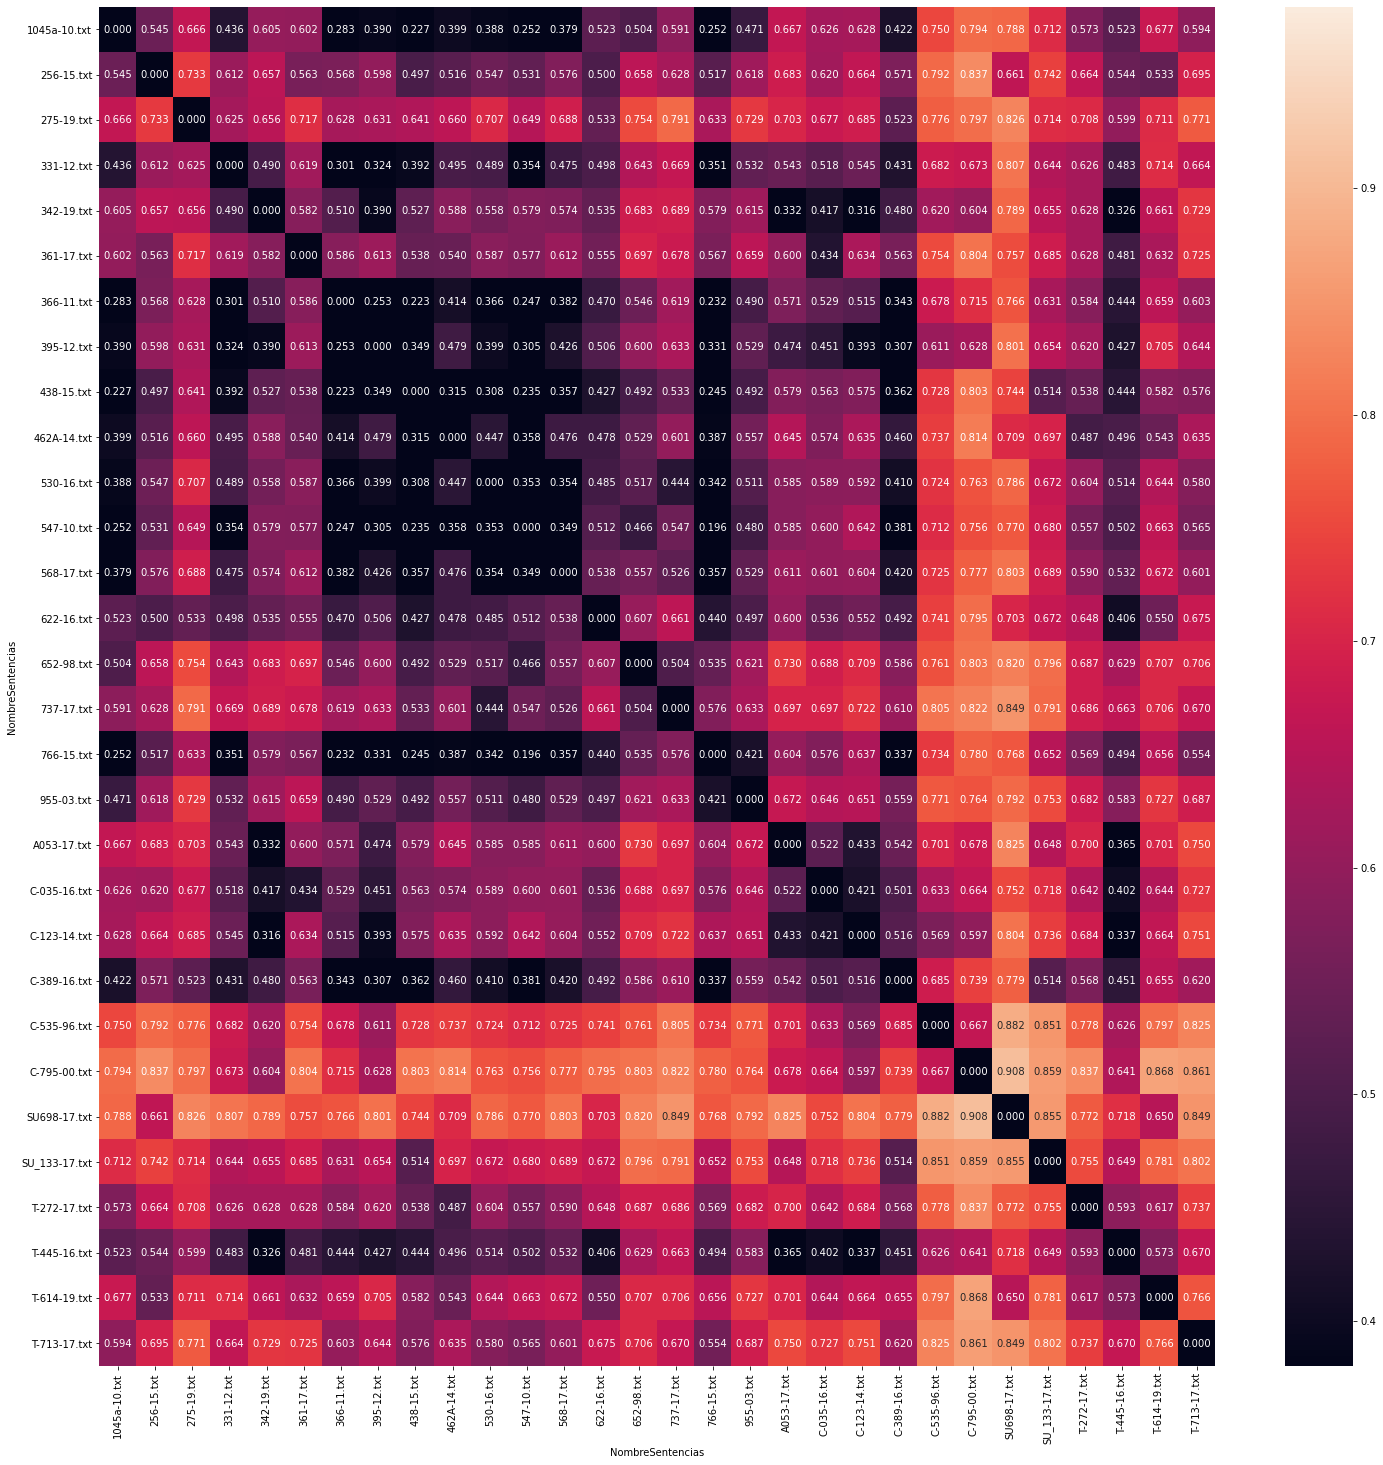

In [21]:
fig, ax = plt.subplots(figsize=(25,25))
sn.heatmap(dist_cos
           , annot=True
           , vmin=0.38
           , vmax=0.98 
           , fmt=".3f"
           , ax=ax
          )

### Visualización K means

In [22]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [23]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros
data=dfTotalLibros
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  
0   ii consideraciones corte constitucional primer...    8503  
1   consideraciones fundamentos corte competencia ...   27389  
2   consideraciones corte constitucional competenc...   16801  
3   vi fundamentos decisión competencia corte conf...    6190  
4   ii consideraciones corte competencia sala comp...    9693  
5   ii consideraciones fundamentos competencia cor...   40987  
6   consideraciones fundamentos competencia confor...   18666  
7   consideraciones fundamentos competencia virtud...    8928  
8   consideraciones corte constitucional competenc...   12911  
9   consideraciones corte constitucional competenc...   27960  
10  ii consideraciones fundamentos problema jurídi...   13210  
11  consideraciones preliminares establecer si cas...   11363  
12  iii revisión corte constitucional competencia ...   11273  
13  iv consideraciones fundamentos competencia cor...   38212  
14  consideraciones corte competencia corte consti...    6553  
15  i consideraciones competencia corte competente...    7127  
16  iv consideraciones competencia competente sala...   11341  
17  consideraciones fundamentos competencia corte ...    8917  
18  auto solicitud nulidad sentencia corte constit...   13602  
19  consideraciones corte constitucional asunto pr...   30879  
20  vi consideraciones fundamentos competencia cor...    7767  
21  v consideraciones competencia corte competente...   27225  
22  vi fundamentos jurídicos competencia corte con...    4861  
23  vi consideraciones fundamentos competencia tér...    1846  
24  i consideraciones competencia tribunal compete...   15954  
25  sentencia expediente t partes orlando je

In [24]:
tfidf_vect_2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect_2.fit_transform(data.textoLimpio.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect_2.get_feature_names())
tfidf_matrix

aarhus       aas      aati        ab     abajo  abandona  abandonada  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
5   0.005166  0.000000  0.000000  0.000000  0.004619  0.000000    0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.007645  0.000000    0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
9   0.000000  0.002866  0.000000  0.000000  0.001714  0.000000    0.002335   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
12  0.000000  0.000000  0.006405  0.000000  0.000000  0.000000    0.000000   
13  0.001980  0.000000  0.000000  0.000000  0.002656  0.000000    0.001810   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.000000  0.006658    0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.001538  0.000000    0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.001805  0.000000    0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
24  0.000000  0.000000  0.000000  0.000000  0.005789  0.000000    0.002629   
25  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
27  0.000000  0.000000  0.000000  0.004024  0.000000  0.000000    0.000000   
28  0.000000  0.000000  0.000000  0.000000  0.005226  0.000000    0.000000   
29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   

    abandonadas  abandonado  abandonados  ...    último   últimos     única  \
0      0.000000    0.000000     0.000000  ...  0.002411  0.000000  0.000000   
1      0.000000    0.000000     0.000000  ...  0.002224  0.001073  0.003734   
2      0.000000    0.000000     0.000000  ...  0.008316  0.006877  0.005983   
3      0.000000    0.000000     0.000000  ...  0.002835  0.000000  0.000000   
4      0.000000    0.000000     0.000000  ...  0.013612  0.003283  0.011424   
5      0.000000    0.000000     0.000000  ...  0.004956  0.000000  0.002080   
6      0.000000    0.000000     0.000000  ...  0.008507  0.001759  0.001530   
7      0.000000    0.000000     0.000000  ...  0.000000  0.000000  0.000000   
8      0.000000    0.000000     0.000000  ...  0.003457  0.000000  0.006529   
9      0.002164    0.000000     0.002866  ...  0.005721  0.000000  0.002058   
10     0.000000    0.000000     0.000000  ...  0.007636  0.006630  0.000000   
11     0.000000    0.000000     0.000000  ...  0.000000  0.002586  0.000000   
12     0.000000    0.000000     0.000000  ...  0.016438  0.000000  0.006898   
13     0.005031    0.000000     0.000000  ...  0.017734  0.009166  0.001595   
14     0.000000    0.000000     0.000000  ...  0.002900  0.004197  0.003651   
15     0.000000    0.000000     0.000000  ...  0.011385  0.000000  0.000000   
16     0.000000    0.000000     0.000000  ...  0.007594  0.005495  0.000000   
17     0.000000    0.000000     0.000000  ...  0.013466  0.000000  0.002825   
18     0.000000    0.005122     0.000000  ...  0.001460  0.002113  0.003677   
19     

### Método del codo para calibrar el modelo

In [25]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

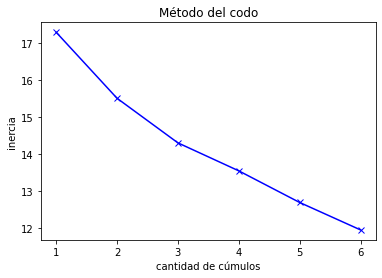

In [26]:
ks = []
k_inertia = []
for k in range (1,7):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)

plt.xlabel('cantidad de cúmulos')
plt.ylabel('inercia')
plt.title('Método del codo')
plt.plot(ks,k_inertia, 'bx-')

In [27]:
k=3
model= KMeans(n_clusters=k)
model.fit(tfidf_matrix)

data['cluster']=model.labels_
data.head(30)

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  
0   ii consideraciones corte constitucional primer...    8503        2  
1   consideraciones fundamentos corte competencia ...   27389        0  
2   consideraciones corte constitucional competenc...   16801        0  
3   vi fundamentos decisión competencia corte conf...    6190        2  
4   ii consideraciones corte competencia sala comp...    9693        1  
5   ii consideraciones fundamentos competencia cor...   40987        1  
6   consideraciones fundamentos competencia confor...   18666        2  
7   consideraciones fundamentos competencia virtud...    8928        2  
8   consideraciones corte constitucional competenc...   12911        2  
9   consideraciones corte constitucional competenc...   27960        2  
10  ii consideraciones fundamentos problema jurídi...   13210        2  
11  consideraciones preliminares establecer si cas...   11363        2  
12  iii revisión corte constitucional competencia ...   11273        2  
13  iv consideraciones fundamentos competencia cor...   38212        0  
14  consideraciones corte competencia corte consti...    6553        2  
15  i consideraciones competencia corte competente...    7127        2  
16  iv consideraciones competencia competente sala...   11341        2  
17  consideraciones fundamentos competencia corte ...    8917        2  
18  auto solicitud nulidad sentencia corte constit...   13602        1  
19  consideraciones corte constitucional asunto pr...   30879        1  
20  vi consideraciones fundamentos competencia cor...    7767        1  
21  v consideraciones competencia corte competente...   27225        2  
22  vi fundamentos jurídicos 

### Términos más importantes por cada cluster

In [28]:
k=3
model= KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs= NearestNeighbors(n_neighbors=2, metric="euclidean").fit(tfidf_matrix.values)

In [29]:
tfidf_vect.vocabulary_

{'ii': 10861,
 'consideraciones': 4699,
 'corte': 5343,
 'constitucional': 4785,
 'primera': 16641,
 'competencia': 4033,
 'corresponde': 5304,
 'analizar': 1325,
 'sala': 19055,
 'revisión': 18804,
 'fallo': 9407,
 'proferido': 16806,
 'dentro': 6226,
 'acción': 193,
 'tutela': 21114,
 'referencia': 17903,
 'fundamento': 9904,
 'artículos': 1946,
 'constitución': 4797,
 'decreto': 5936,
 'segunda': 19270,
 'debate': 5811,
 'afirmaron': 754,
 'actores': 370,
 'otorgó': 15135,
 'señor': 19456,
 'héctor': 10742,
 'jesús': 12474,
 'sarria': 19177,
 'concesión': 4291,
 'explotación': 9154,
 'territorios': 20586,
 'corresponden': 5305,
 'mediara': 13509,
 'consulta': 4854,
 'previa': 16598,
 'alguna': 1047,
 'cuanto': 5525,
 'informó': 11615,
 'consultó': 4879,
 'comunidad': 4192,
 'directamente': 7103,
 'afectada': 707,
 'tercera': 20544,
 'protección': 17077,
 'debe': 5820,
 'identidad': 10789,
 'integridad': 11950,
 'étnica': 22180,
 'cultural': 5616,
 'social': 19694,
 'económica': 7596

In [30]:
len(tfidf_vect.vocabulary_)

22232

### Centroides y términos más cercanos

In [31]:
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[  897,  3440,  1908, ..., 12750, 12746,     0],
       [ 1945, 19353, 12814, ...,  8311, 22082,  1908],
       [ 4193, 11505,  4854, ..., 15354, 10723,  1908]], dtype=int64)

In [32]:
data['cluster']=model.labels_

centroides= model.cluster_centers_
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
terms= tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range (k):
    print(f"Cluster #{i}")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :200]:#este es el número de palabras que quiero que me muestre por cluster
          print(f"{terms[idx]}", end=" ")
    print("\n\n")

CLUSTERS:

Cluster #0
TERMINOS:  agua cerrejón arroyo derecho comunidad derechos bruno comunidades guajira resguardo ambiente salud indígenas boyacá proceso carbones tutela ambiental empresa indígena acción constitución provincial protección corte sentencia patilla chancleta ambientales caso katío sala embera constitucional así territorio desarrollo limited pueblos cc carbón servicios medidas proyecto fundamentales desviación potable artículo ministerio nacional parte fundamental medio puerto debe µg vida ii cauce seco barrancas municipio servicio ecosistémicos aguas general ant debido ser tierras recursos particulado manera si accionada cuenta judicial consulta explotación condiciones dentro pm pueblo colectivo asentada iii predio contaminación bosque cuaderno puede acueducto incertidumbres calidad entidades ver aire lugar corpoguajira social ley folio actividades presente material acceso garantizar ello zona previa departamento anterior principio naturales minera accionante reasentam

### Documentos que integran los cluster

In [33]:
nbrs= NearestNeighbors(n_neighbors=2, metric="euclidean").fit(tfidf_matrix.values)

In [34]:
data['cluster'] = model.labels_

#por buena práctica hacemos la siguiente linea
clust_cnt=data ['cluster'].value_counts()
clust_cnt_pct=data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range (k):
    print(f"Cluster #{i} ")
    print (f"{clust_cnt[i]} textos ({clust_cnt[i]:.2%} de los datos)")
    print(f"TERMINOS: "  , end=" ")
    for idx in order_centroids[i, :200]:
        print (f"{terms[idx]}", end= " ")
    print ("\n\n")
    print (f"Términos representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides [i]])[1][0]]['Texto'].values:
        print(f"*{texto}")
    print ("\n\n")

CLUSTERS:

Cluster #0 
4 textos (400.00% de los datos)
TERMINOS:  agua cerrejón arroyo derecho comunidad derechos bruno comunidades guajira resguardo ambiente salud indígenas boyacá proceso carbones tutela ambiental empresa indígena acción constitución provincial protección corte sentencia patilla chancleta ambientales caso katío sala embera constitucional así territorio desarrollo limited pueblos cc carbón servicios medidas proyecto fundamentales desviación potable artículo ministerio nacional parte fundamental medio puerto debe µg vida ii cauce seco barrancas municipio servicio ecosistémicos aguas general ant debido ser tierras recursos particulado manera si accionada cuenta judicial consulta explotación condiciones dentro pm pueblo colectivo asentada iii predio contaminación bosque cuaderno puede acueducto incertidumbres calidad entidades ver aire lugar corpoguajira social ley folio actividades presente material acceso garantizar ello zona previa departamento anterior principio natu

### Visualización usando PCA

In [35]:
data['texto_peq']=data['textoLimpio'].apply(lambda texto: texto[:100])
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        2   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   consideraciones corte constitucional competenc...   16801        1   
3   vi fundamentos decisión competencia corte conf...    6190        2   
4   ii consideraciones corte competencia sala comp...    9693        1   
5   ii consideraciones fundamentos competencia cor...   40987        1   
6   consideraciones fundamentos competencia confor...   18666        2   
7   consideraciones fundamentos competencia virtud...    8928        2   
8   consideraciones corte constitucional competenc...   12911        2   
9   consideraciones corte constitucional competenc...   27960        2   
10  ii consideraciones fundamentos problema jurídi...   13210        2   
11  consideraciones preliminares establecer si cas...   11363        2   
12  iii revisión corte constitucional competencia ...   11273        2   
13  iv consideraciones fundamentos competencia cor...   38212        1   
14  consideraciones corte competencia corte consti...    6553        2   
15  i consideraciones competencia corte competente...    7127        0   
16  iv consideraciones competencia competente sala...   11341        2   
17  consideraciones fundamentos competencia corte ...    8917        2   
18  auto solicitud nulidad sentencia corte constit...   13602        1   
19  consideraciones corte constitucional asunto pr...   30879        1   
20  vi consideraciones fundamentos competencia cor...    7767        1   
21  v consideraciones competencia corte competente...   27225        2   
22  vi

In [36]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values
result['nombre'] = data.NombreSentencias.values
result

X         Y  cluster  \
0  -0.398856 -0.096328        2   
1  -0.038146  0.355454        0   
2   0.158340  0.100758        1   
3  -0.083428 -0.274353        2   
4   0.394298 -0.242587        1   
5   0.147115  0.192952        1   
6  -0.264839 -0.253297        2   
7  -0.039802 -0.378669        2   
8  -0.348734 -0.067585        2   
9  -0.215834  0.149982        2   
10 -0.267207 -0.049166        2   
11 -0.393292 -0.140488        2   
12 -0.263627 -0.080061        2   
13  0.014958  0.133292        1   
14 -0.187833  0.139638        2   
15 -0.148875  0.191485        0   
16 -0.391328 -0.133566        2   
17 -0.144953 -0.000736        2   
18  0.366382 -0.204512        1   
19  0.340592 -0.066250        1   
20  0.442411 -0.241481        1   
21 -0.093237 -0.163479        2   
22  0.382144 -0.095363        1   
23  0.458717 -0.179696        1   
24  0.199042  0.602995        0   
25  0.094992  0.035004        1   
26 -0.010267  0.226703        1   
27  0.281293 -0.095348        1   
28  0.142078  0.505810        0   
29 -0.132105  0.128892        2   

                                                texto         nombre  
0   ii consideraciones corte constitucional primer...   1045a-10.txt  
1   consideraciones fundamentos corte competencia ...     256-15.txt  
2   consideraciones corte constitucional competenc...     275-19.txt  
3   vi fundamentos decisión competencia corte conf...     331-12.txt  
4   ii consideraciones corte competencia sala comp...     342-19.txt  
5   ii consideraciones fundamentos competencia cor...     361-17.txt  
6   consideraciones fundamentos competencia confor...     366-11.txt  
7   consideraciones fundamentos competencia virtud...     395-12.txt  
8   consideraciones corte constitucional competenc...     438-15.txt  
9   consideraciones corte constitucional competenc...    462A-14.txt  
10  ii consideraciones fundamentos problema jurídi...     530-16.txt  
11  consideraciones preliminares establecer si cas...     547-10.txt  
12  iii revisión corte constitucional competencia ...     568-17.txt  
13  iv consideraciones fundamentos competencia cor...     622-16.txt  
14  consideraciones corte competencia corte consti...     652-98.txt  
15  i consideraciones competencia corte competente...     737-17.txt  
16  iv consideraciones competencia competente sala...     766-15.txt  
17  consideraciones fundamentos competencia corte ...     955-03.txt  
18  auto solicitud nulidad sentencia corte constit...    A053-17.txt  
19  consideraciones corte constitucional asunto pr...   C-035-16.txt  
20  vi consideraciones fundamentos competencia cor...   C-123-14.txt  
21  v consideraciones competencia corte competente...   C-389-16.txt  
22  vi fundamentos jurídicos competencia corte con...   C-535-96.txt  
23  vi consideraciones fundamentos competencia tér...   C-795-00.txt  
24  i consideraciones competencia tribunal compete...   SU698-17.txt  
25  sentencia expediente t partes orlando jesús ra...  SU_133-17.txt  
26  ii consideraciones fundamentos competencia sal...   T-272-17.txt  
27  ii consideraciones fundamentos competencia sal...   T-445-16.txt  
28  ii consideraciones competencia sala revisión c...   T-614-19.txt  
29  ii consideraciones fundamentos competencia sal...   T-713-17.txt

In [37]:
result['texto'] = data.textoLimpio.apply(lambda val: val[:300])

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)


### Conteo de palabras frecuentes

In [38]:
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        2   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   consideraciones corte constitucional competenc...   16801        1   
3   vi fundamentos decisión competencia corte conf...    6190        2   
4   ii consideraciones corte competencia sala comp...    9693        1   
5   ii consideraciones fundamentos competencia cor...   40987        1   
6   consideraciones fundamentos competencia confor...   18666        2   
7   consideraciones fundamentos competencia virtud...    8928        2   
8   consideraciones corte constitucional competenc...   12911        2   
9   consideraciones corte constitucional competenc...   27960        2   
10  ii consideraciones fundamentos problema jurídi...   13210        2   
11  consideraciones preliminares establecer si cas...   11363        2   
12  iii revisión corte constitucional competencia ...   11273        2   
13  iv consideraciones fundamentos competencia cor...   38212        1   
14  consideraciones corte competencia corte consti...    6553        2   
15  i consideraciones competencia corte competente...    7127        0   
16  iv consideraciones competencia competente sala...   11341        2   
17  consideraciones fundamentos competencia corte ...    8917        2   
18  auto solicitud nulidad sentencia corte constit...   13602        1   
19  consideraciones corte constitucional asunto pr...   30879        1   
20  vi consideraciones fundamentos competencia cor...    7767        1   
21  v consideraciones competencia corte competente...   27225        2   
22  vi

In [39]:
#Convertimos la Serie en texto y le asignamos el valor de la cantidad de palabras 
idx = pd.Index(data['textoLimpio'])
data['NumPalabras'] = 0
for i in range(len(idx.str.split())):
    data.NumPalabras[i] = len(idx.str.split()[i])

C:\Users\villa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
data[['NombreSentencias', 'NumPalabras']].sort_values(by='NumPalabras', ascending=False)

NombreSentencias  NumPalabras
5        361-17.txt        40987
13       622-16.txt        38212
19     C-035-16.txt        30879
9       462A-14.txt        27960
1        256-15.txt        27389
21     C-389-16.txt        27225
27     T-445-16.txt        23952
6        366-11.txt        18666
2        275-19.txt        16801
24     SU698-17.txt        15954
28     T-614-19.txt        15927
29     T-713-17.txt        14639
18      A053-17.txt        13602
10       530-16.txt        13210
8        438-15.txt        12911
11       547-10.txt        11363
16       766-15.txt        11341
12       568-17.txt        11273
4        342-19.txt         9693
7        395-12.txt         8928
17       955-03.txt         8917
0      1045a-10.txt         8503
20     C-123-14.txt         7767
25    SU_133-17.txt         7344
15       737-17.txt         7127
26     T-272-17.txt         6976
14       652-98.txt         6553
3        331-12.txt         6190
22     C-535-96.txt         4861
23     C-795-00.txt         1846

In [41]:
#Concatenamos todas las palabras que están dentro del campo donde se indican los argumentos de la corte

texto = " ".join(razon for razon in data['textoLimpio'])

In [42]:
print ("Existen {} palabras en las consideraciones de la Corte Constitucional".format(len(texto)))

Existen 4068402 palabras en las consideraciones de la Corte Constitucional


In [43]:
import nltk
from nltk.corpus import stopwords
from nltk import collections

In [44]:
#Descargamso las palabras de conexión o StopWords para que no nos aparezca estas palabras dentro del conteo 
nltk.download('stopwords')
palabras_conexion = set(stopwords.words('spanish'))

#Eliminamos de nuestra lista, las palabras conexión
palabrasLimpias = [palabra for palabra in texto.lower().split() if not palabra in palabras_conexion]

#Transformamos a lista y contamos la cantidad de ocurrencias por palabra
palabras = collections.Counter(list(palabrasLimpias))

#Luego, lo pasamos a un DataFrame:
dfPalabras = pd.DataFrame(palabras.most_common(100),
                         columns=['palabra','cantidad'])

palabras.most_common(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('derecho', 3373),
 ('comunidades', 3232),
 ('derechos', 2862),
 ('artículo', 2575),
 ('corte', 2473),
 ('indígenas', 2459),
 ('sentencia', 2364),
 ('constitucional', 2026),
 ('c', 2014),
 ('consulta', 1939),
 ('ley', 1913),
 ('participación', 1894),
 ('t', 1878),
 ('desarrollo', 1861),
 ('recursos', 1728),
 ('ambiente', 1720),
 ('protección', 1627),
 ('pueblos', 1561),
 ('ambiental', 1542),
 ('comunidad', 1484),
 ('así', 1443),
 ('debe', 1438),
 ('nacional', 1391),
 ('parte', 1373),
 ('constitución', 1333),
 ('ser', 1324),
 ('territorio', 1317),
 ('caso', 1316),
 ('proceso', 1311),
 ('previa', 1291),
 ('explotación', 1193),
 ('p', 1157),
 ('naturales', 1153),
 ('principio', 1131),
 ('medio', 1119),
 ('si', 1106),
 ('manera', 1096),
 ('agua', 1086),
 ('minera', 1052),
 ('sala', 1051),
 ('medidas', 1043),
 ('puede', 1003),
 ('actividades', 988),
 ('tutela', 981),
 ('general', 978),
 ('social', 976),
 ('acción', 957),
 ('minería', 956),
 ('autoridades', 951),
 ('territorios', 931),
 ('m

In [45]:
dfPalabras.tail()

palabra  cantidad
95    étnicas       573
96     pueblo       571
97   anterior       568
98     pueden       563
99  artículos       556

### Pasar palabras a excel

In [46]:
dfPalabras.to_excel('CC_Si.xls')

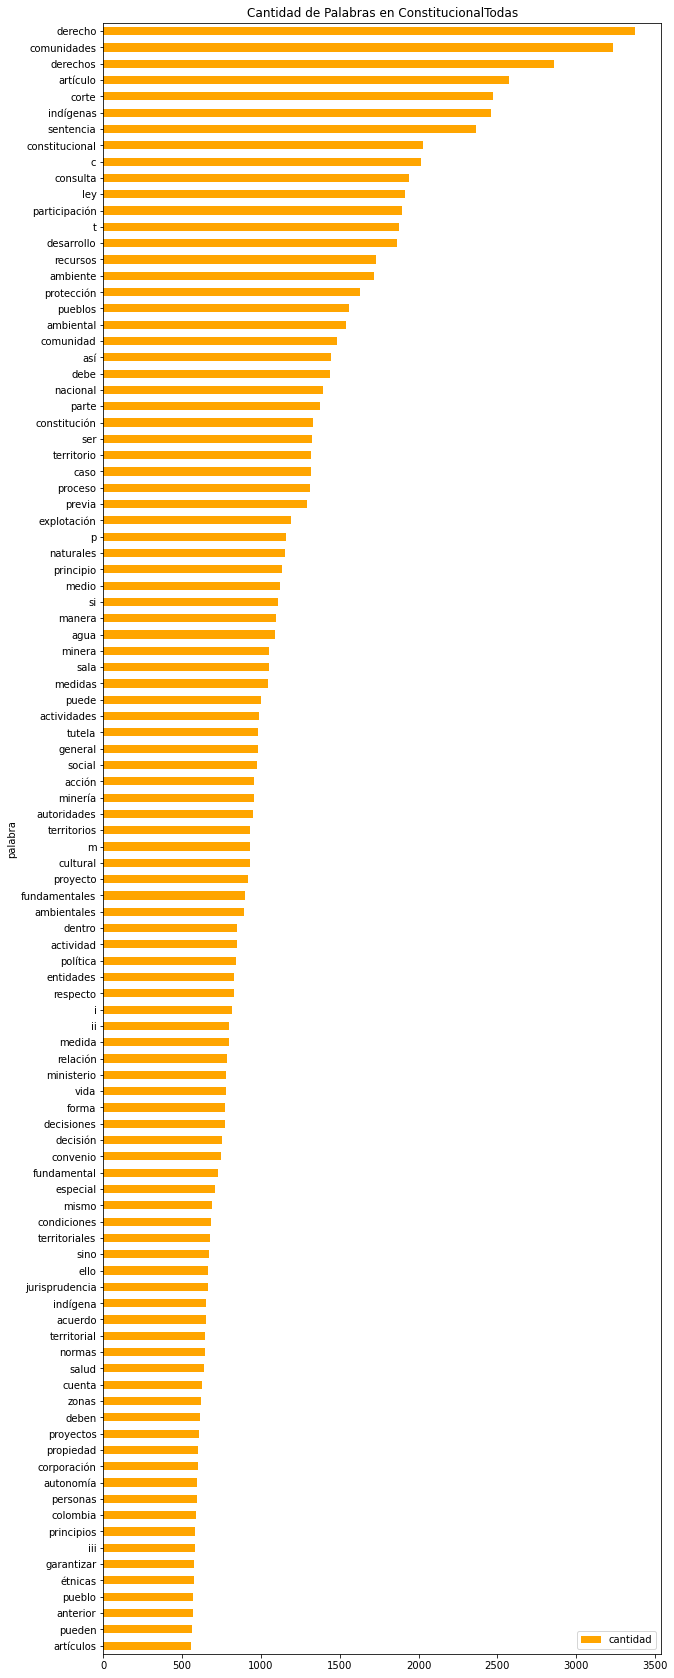

In [47]:
#Ahora, imprimamos en un Plot de Barras el resultado de las palabras más comunes
fig, ax = plt.subplots(figsize=(10, 30))

dfPalabras.sort_values(by='cantidad').plot.barh(x='palabra',
                      y='cantidad',
                      ax=ax,
                      color="orange")

ax.set_title("Cantidad de Palabras en ConstitucionalTodas")

plt.show()

### DHL 

In [48]:
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        2   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   consideraciones corte constitucional competenc...   16801        1   
3   vi fundamentos decisión competencia corte conf...    6190        2   
4   ii consideraciones corte competencia sala comp...    9693        1   
5   ii consideraciones fundamentos competencia cor...   40987        1   
6   consideraciones fundamentos competencia confor...   18666        2   
7   consideraciones fundamentos competencia virtud...    8928        2   
8   consideraciones corte constitucional competenc...   12911        2   
9   consideraciones corte constitucional competenc...   27960        2   
10  ii consideraciones fundamentos problema jurídi...   13210        2   
11  consideraciones preliminares establecer si cas...   11363        2   
12  iii revisión corte constitucional competencia ...   11273        2   
13  iv consideraciones fundamentos competencia cor...   38212        1   
14  consideraciones corte competencia corte consti...    6553        2   
15  i consideraciones competencia corte competente...    7127        0   
16  iv consideraciones competencia competente sala...   11341        2   
17  consideraciones fundamentos competencia corte ...    8917        2   
18  auto solicitud nulidad sentencia corte constit...   13602        1   
19  consideraciones corte constitucional asunto pr...   30879        1   
20  vi consideraciones fundamentos competencia cor...    7767        1   
21  v consideraciones competencia corte competente...   27225        2   
22  vi

In [49]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [50]:
def pre_procesado(texto):
    texto=str(texto)
    texto = texto.lower()
    #texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = re.sub(r"[\s]+", " ", texto) 
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    #texto = [spanishStemmer.stem(palabra) for palabra in texto.split() ]
    return texto

In [51]:
data['pre_procesado'] = data['Texto'].apply(lambda texto: pre_procesado(texto))
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
3        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
4        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
5        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
6        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
7        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
8        438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
9       462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
10       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
11       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
12       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
13       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
14       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
15       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
16       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
17       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
18      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
19     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
20     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
21     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
22     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
23     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
24     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
25    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
26     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
27     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
28     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
29     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        2   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   consideraciones corte constitucional competenc...   16801        1   
3   vi fundamentos decisión competencia corte conf...    6190        2   
4   ii consideraciones corte competencia sala comp...    9693        1   
5   ii consideraciones fundamentos competencia cor...   40987        1   
6   consideraciones fundamentos competencia confor...   18666        2   
7   consideraciones fundamentos competencia virtud...    8928        2   
8   consideraciones corte constitucional competenc...   12911        2   
9   consideraciones corte constitucional competenc...   27960        2   
10  ii consideraciones fundamentos problema jurídi...   13210        2   
11  consideraciones preliminares establecer si cas...   11363        2   
12  iii revisión corte constitucional competencia ...   11273        2   
13  iv consideraciones fundamentos competencia cor...   38212        1   
14  consideraciones corte competencia corte consti...    6553        2   
15  i consideraciones competencia corte competente...    7127        0   
16  iv consideraciones competencia competente sala...   11341        2   
17  consideraciones fundamentos competencia corte ...    8917        2   
18  auto solicitud nulidad sentencia corte constit...   13602        1   
19  consideraciones corte constitucional asunto pr...   30879        1   
20  vi consideraciones fundamentos competencia cor...    7767        1   
21  v consideraciones competencia corte competente...   27225        2   
22  vi

In [52]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [53]:
dictionary = Dictionary(data['pre_procesado'].values)
dictionary

In [54]:
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in data['pre_procesado'].values]
corpus;

In [55]:
model3 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=300)
model3

model3.print_topics(num_words=100)

[(0,
  '0.005*"cargos" + 0.005*"nulidad" + 0.004*"restitución" + 0.003*"víctimas" + 0.003*"c-123" + 0.003*"1753" + 0.003*"concurrencia" + 0.003*"concejos" + 0.003*"utilidad" + 0.003*"2016" + 0.003*"exequibilidad" + 0.003*"páramos" + 0.003*"unitario" + 0.003*"expropiación" + 0.003*"inexequibilidad" + 0.002*"(mp." + 0.002*"cosa" + 0.002*"acusada" + 0.002*"1382" + 0.002*"1450" + 0.002*"crecimiento" + 0.002*"(m.p." + 0.002*"territoriales." + 0.002*"suelo," + 0.002*"precedente" + 0.002*"pregunta" + 0.002*"–artículo" + 0.002*"minas," + 0.002*"288" + 0.002*"juzgada" + 0.002*"regionales" + 0.002*"hidrocarburos" + 0.002*"tensión" + 0.002*"2015." + 0.002*"coordinación," + 0.002*"motivos" + 0.002*"//" + 0.002*"subsuelo," + 0.002*"prohibir" + 0.001*"2016," + 0.001*"reglamentar" + 0.001*"distritales" + 0.001*"ecosistema" + 0.001*"colombia." + 0.001*"causales" + 0.001*"minería." + 0.001*"ortiz" + 0.001*"municipio," + 0.001*"limitación" + 0.001*"núcleo" + 0.001*"311" + 0.001*"distritos" + 0.001*"legi

In [56]:
lda_display = pyLDAvis.gensim.prepare(model3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
# pyLDAvis.save_html(lda_display, 'lda.html')